In [12]:
#In this machine learning project, I have collected the Heart disease dataset and I will be using Machine Learning to make predictions on whether a person is suffering from Heart Disease or not.


# Import libraries

In [1]:

#Let's first import all the necessary libraries. I'll use pandas for data manipulation. 
#For visualization, I will use matplotlib and seaborn. 
 #For implementing Machine Learning models and processing of data, I will use the sklearn library.

In [2]:
#importing allthe libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
#For processing the data, I'll import a few libraries. To split the available dataset for testing and training, I'll use the train_test_split method. 
#To do  feature selection, I am using SelectKbest.
#to build regression model i will be using LogisticRegression 

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest,f_regression


In [5]:
#for checking the performance of the model i am using confusion matrix,accuracy score,recall,precision and f1 score

In [6]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [7]:
#Next, I'll import all the Machine Learning algorithms I will be using.

#K Neighbors Classifier
#Support Vector Classifier
#Decision Tree Classifier
#Random Forest Classifier

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Import dataset

In [9]:

#Now that we have all the libraries we will need, I can import the dataset and take a look at it. The dataset is stored as a csv file.
#I'll use the pandas read_csv method to read the dataset.

In [10]:
header_row = ['age','sex','pain','BP','chol','fbs','ecg','maxhr','eiang','eist','slope','vessels','thal','diagnosis']
df = pd.read_csv(r'C:\Users\Arun Dominic Savio\Documents\Documents\104380_Python and ML Projects_HeartDiseasePrediction_392814\Heart Disease data.txt', names=header_row)

In [11]:
df.head()

,age,sex,pain,BP,chol,fbs,ecg,maxhr,eiang,eist,slope,vessels,thal,diagnosis
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [12]:
#The dataset is now loaded into the variable df. 
#I'll just take a glimpse of the data using the desribe(),shape,info() methods before I actually start processing and visualizing it.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        303 non-null    float64
 1   sex        303 non-null    float64
 2   pain       303 non-null    float64
 3   BP         303 non-null    float64
 4   chol       303 non-null    float64
 5   fbs        303 non-null    float64
 6   ecg        303 non-null    float64
 7   maxhr      303 non-null    float64
 8   eiang      303 non-null    float64
 9   eist       303 non-null    float64
 10  slope      303 non-null    float64
 11  vessels    303 non-null    object 
 12  thal       303 non-null    object 
 13  diagnosis  303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [14]:
#Looks like the dataset has a total of 303 rows and there are no missing values. 
#There are a total of 13 features along with one target value which we wish to find.

In [15]:
df.describe()

,age,sex,pain,BP,chol,fbs,ecg,maxhr,eiang,eist,slope,diagnosis
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [16]:
#The scale of each feature column is different and quite varied as well. 
#While the maximum for age reaches 77, the maximum of chol is 564.

In [17]:
df.shape

(303, 14)

In [18]:
df.dtypes
#it gives idea about the data type of each feature

age          float64
sex          float64
pain         float64
BP           float64
chol         float64
fbs          float64
ecg          float64
maxhr        float64
eiang        float64
eist         float64
slope        float64
vessels       object
thal          object
diagnosis      int64
dtype: object

In [19]:
df["diagnosis"].unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [20]:
#replace all the values of "diagnosis" with 0 and 1

In [21]:
df["diagnosis"]=df["diagnosis"].replace([1,2,3,4],[1,1,1,1])

In [22]:
df["diagnosis"].unique()

array([0, 1], dtype=int64)

In [39]:
df["pain"].unique()

array([1., 4., 3., 2.])

In [40]:
df["thal"].unique()

array([6., 3., 7.])

In [41]:
df["ecg"].unique()

array([2., 0., 1.])

In [42]:
df["age"].unique()

array([63., 67., 37., 41., 56., 62., 57., 53., 44., 52., 48., 54., 49.,
       64., 58., 60., 50., 66., 43., 40., 69., 59., 42., 55., 61., 65.,
       71., 51., 46., 45., 39., 68., 47., 34., 35., 29., 70., 77., 38.,
       74., 76.])

In [43]:
df["vessels"].unique()

array([0., 3., 2., 1.])

In [44]:
#converting the "vessels"to numeric data
df["vessels"]=pd.to_numeric(df["vessels"],errors="coerce")

In [45]:
#here we can use fillna method to replace "?"

In [46]:
df["vessels"]=df["vessels"].fillna(df["vessels"].median())

In [47]:
df["vessels"].unique()

array([0., 3., 2., 1.])

In [48]:
df["thal"].unique()

array([6., 3., 7.])

In [49]:
df["thal"]=pd.to_numeric(df["thal"],errors="coerce")

In [50]:
df["thal"]=df["thal"].fillna(df["thal"].median())

In [51]:
df["pain"].unique()

array([1., 4., 3., 2.])

In [52]:
df["BP"].unique()

array([145., 160., 120., 130., 140., 172., 150., 110., 132., 117., 135.,
       112., 105., 124., 125., 142., 128., 170., 155., 104., 180., 138.,
       108., 134., 122., 115., 118., 100., 200.,  94., 165., 102., 152.,
       101., 126., 174., 148., 178., 158., 192., 129., 144., 123., 136.,
       146., 106., 156., 154., 114., 164.])

In [53]:
df.isnull().sum()

age          0
sex          0
pain         0
BP           0
chol         0
fbs          0
ecg          0
maxhr        0
eiang        0
eist         0
slope        0
vessels      0
thal         0
diagnosis    0
dtype: int64

In [54]:
df.head()

,age,sex,pain,BP,chol,fbs,ecg,maxhr,eiang,eist,slope,vessels,thal,diagnosis
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


# EDA

In [55]:
#Now, we can use visualizations to better understand our data and then look at any processing we might want to do.

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'pain'}>, <Axes: title={'center': 'BP'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>, <Axes: title={'center': 'ecg'}>,
        <Axes: title={'center': 'maxhr'}>],
       [<Axes: title={'center': 'eiang'}>,
        <Axes: title={'center': 'eist'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'vessels'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'diagnosis'}>, <Axes: >, <Axes: >]],
      dtype=object)

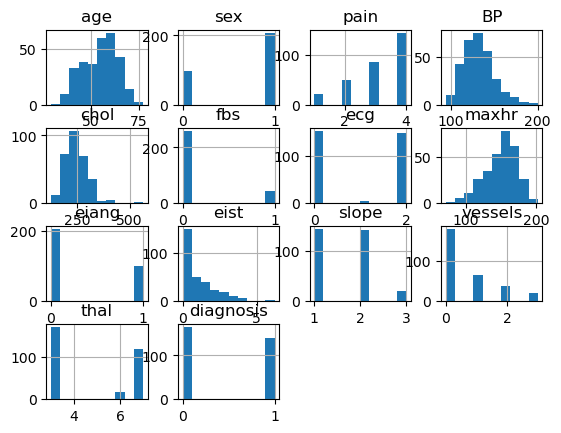

In [56]:
df.hist()

# Outlier detection

In [57]:
#we can check the presence of outliers using box plot

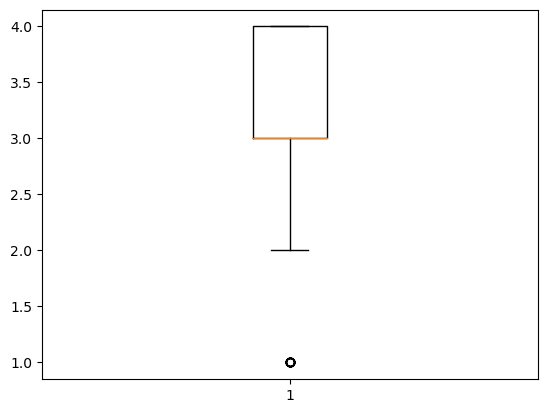

In [58]:
plt.boxplot(df["pain"])
plt.show()

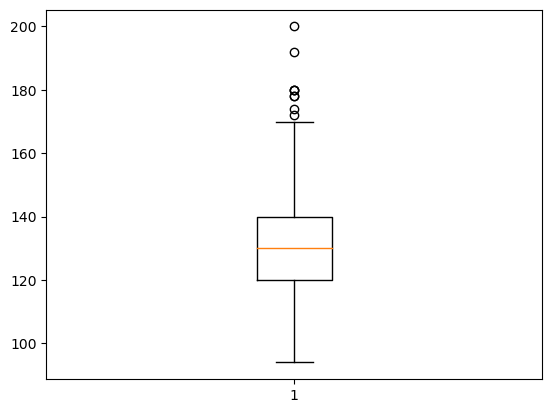

In [59]:
plt.boxplot(df["BP"])
plt.show()

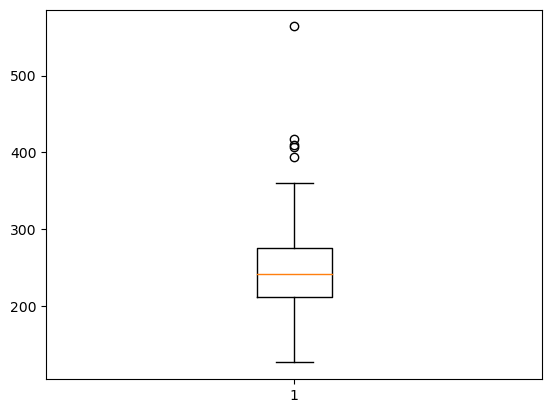

In [60]:
plt.boxplot(df["chol"])
plt.show()

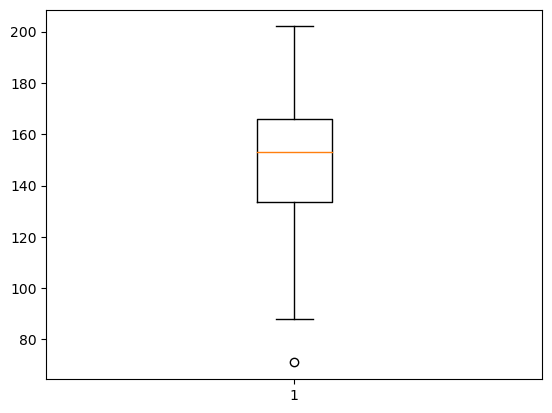

In [61]:
plt.boxplot(df["maxhr"])
plt.show()

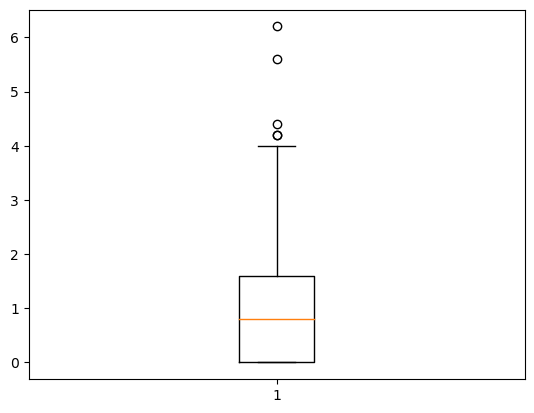

In [62]:
plt.boxplot(df["eist"])
plt.show()

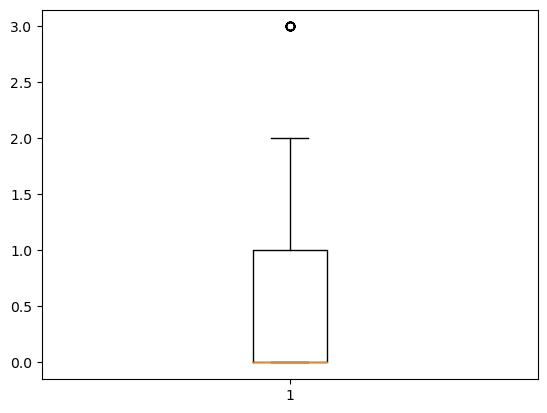

In [63]:
plt.boxplot(df["vessels"])
plt.show()

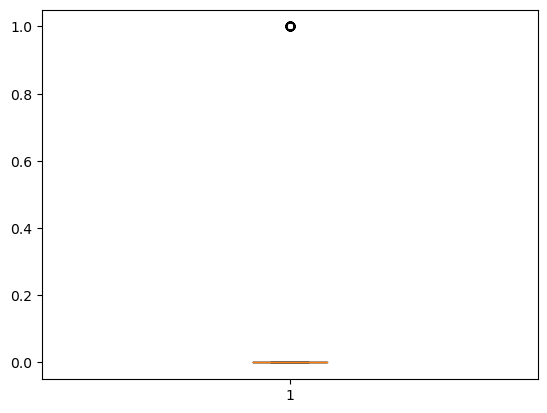

In [64]:
plt.boxplot(df["fbs"])
plt.show()

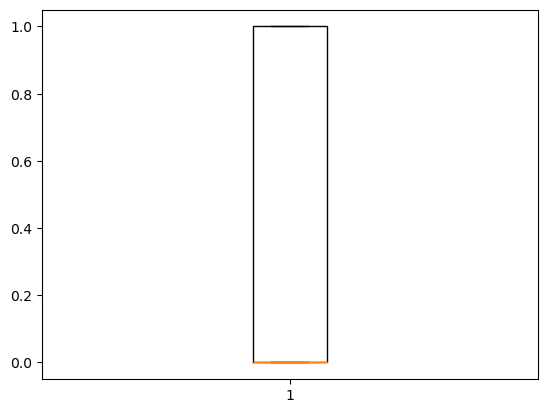

In [65]:
plt.boxplot(df["diagnosis"])
plt.show()

In [66]:
#outliers are present in almost all features

# outlier treatment

In [67]:
# user defined fn for outlier treatment
def remove_outlier(d,c):
    # d is variable for dataframe c for column
    
    # find q1 and q3
    q1=d[c].quantile(0.25)
    q3=d[c].quantile(0.75)
    
    #find iqr=q3-q1
    iqr=q3-q1
    
    # find upper bound and lb
    ub=q3+1.5*iqr
    lb=q1-1.5*iqr
    
    # filter good data (ie eliminate outliers)
    good_data=d[(d[c]<=ub) & (d[c]>=lb)]
    
    return good_data

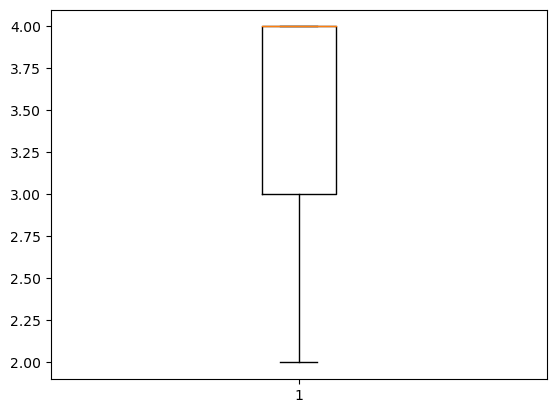

In [68]:
# remove outlies from pain
df=remove_outlier(df,"pain")
plt.boxplot(df["pain"])
plt.show()

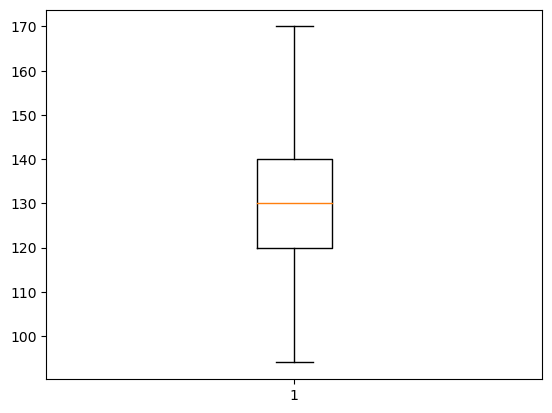

In [69]:
# remove outlies from bp
df=remove_outlier(df,"BP")
plt.boxplot(df["BP"])
plt.show()

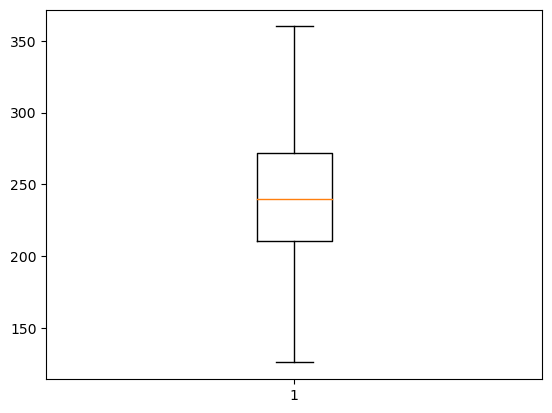

In [70]:
# remove outlies from chol
df=remove_outlier(df,"chol")
plt.boxplot(df["chol"])
plt.show()

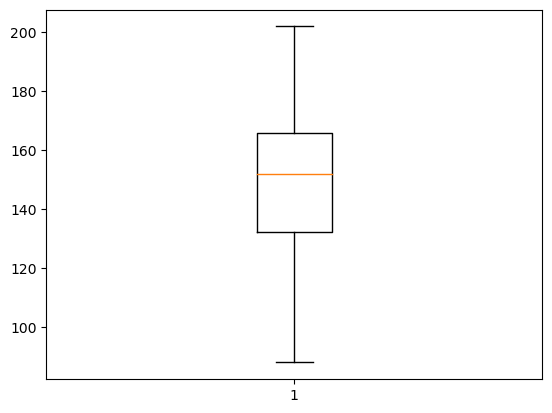

In [71]:
# remove outlies from maxhr
df=remove_outlier(df,"maxhr")
plt.boxplot(df["maxhr"])
plt.show()

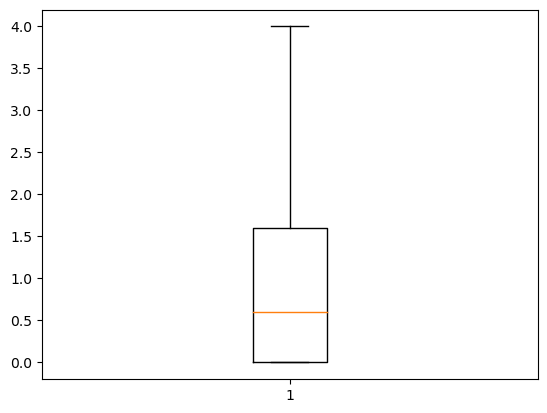

In [72]:
# remove outlies from eist
df=remove_outlier(df,"eist")
plt.boxplot(df["eist"])
plt.show()

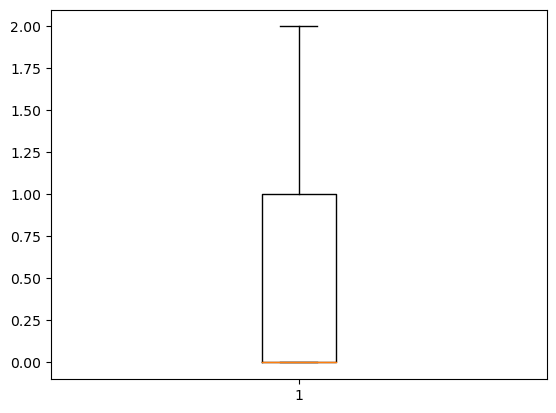

In [73]:
# remove outlies from vessels
df=remove_outlier(df,"vessels")
plt.boxplot(df["vessels"])
plt.show()

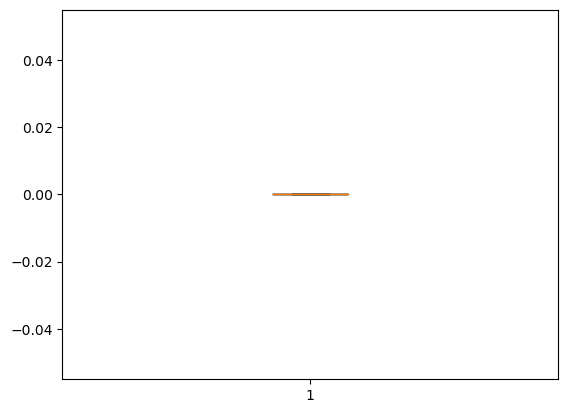

In [74]:
# remove outlies from fbs
df=remove_outlier(df,"fbs")
plt.boxplot(df["fbs"])
plt.show()

In [75]:
df.shape

(216, 14)

In [76]:
df.dtypes

age          float64
sex          float64
pain         float64
BP           float64
chol         float64
fbs          float64
ecg          float64
maxhr        float64
eiang        float64
eist         float64
slope        float64
vessels      float64
thal         float64
diagnosis      int64
dtype: object

# EDA

<Axes: xlabel='diagnosis', ylabel='count'>

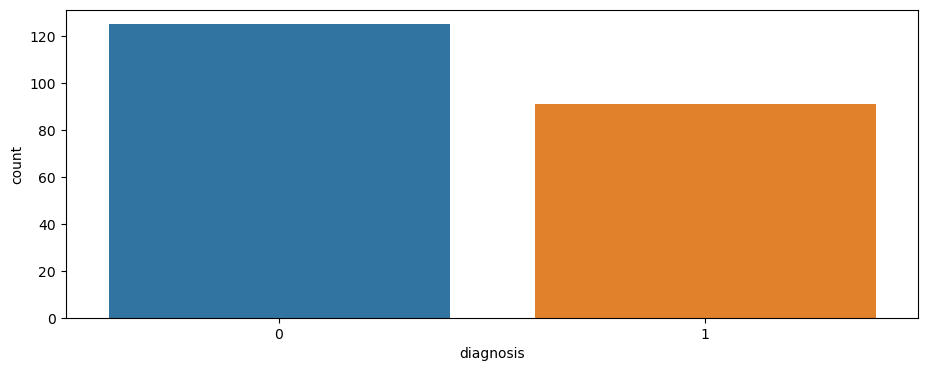

In [77]:
plt.figure(figsize=(11,4))
sns.countplot(data=df,x="diagnosis")

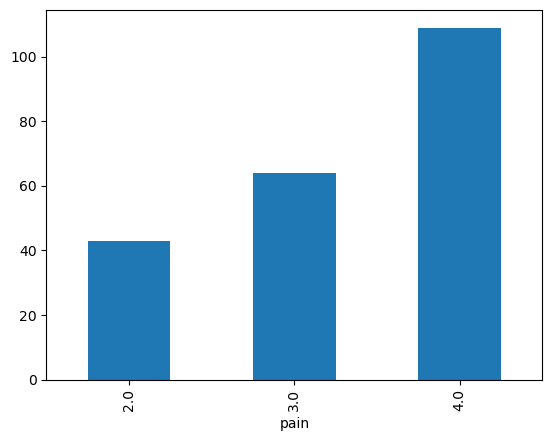

In [78]:
df.groupby("pain")["diagnosis"].count().plot(kind="bar")
plt.show()

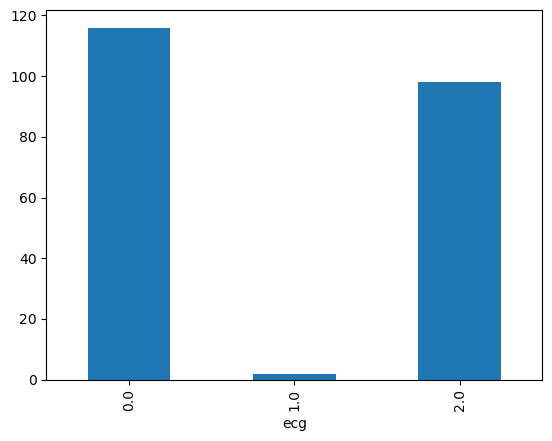

In [79]:
df.groupby("ecg")["diagnosis"].count().plot(kind="bar")
plt.show()

# Creating training and test samples

In [80]:
#I'll now import train_test_split to split our dataset into training and testing datasets.
#Then, I'll import all Machine Learning models I'll be using to train and test the data.

In [81]:
x=df.drop("diagnosis",axis=1)
y=df["diagnosis"]

In [82]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.7,random_state=0)

# Feature Selection

In [83]:
#In Feature selection i used 5 significant features from the data set building the model 

In [84]:
#Extracting most significant features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# to select 5 significant features
key_features=SelectKBest(score_func=f_classif,k=5)
# fit key_featurs to training data and transform it
xtrain_selected=key_features.fit_transform(xtrain,ytrain)
# get the indices of the selected features
selected_indices=key_features.get_support(indices=True)
#get the nale of selected featurs
selected_features=xtrain.columns[selected_indices]

C:\ProgramData\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [5] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\ProgramData\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [85]:
#these are tthe selected features
selected_features

Index(['pain', 'maxhr', 'eiang', 'eist', 'thal'], dtype='object')

In [86]:
#extract x_train from selected features
x_train=xtrain[selected_features]


In [87]:
x_train

,pain,maxhr,eiang,eist,thal
154,4.0,96.0,1.0,2.2,3.0
229,4.0,132.0,1.0,0.1,3.0
34,3.0,179.0,1.0,0.4,3.0
44,4.0,169.0,0.0,0.0,3.0
80,4.0,148.0,1.0,3.0,3.0
...,...,...,...,...,...
88,4.0,160.0,0.0,0.0,3.0
272,4.0,120.0,1.0,1.8,7.0
162,3.0,158.0,0.0,1.6,3.0
66,3.0,155.0,0.0,3.0,3.0


In [88]:
x_test=xtest[selected_features]
# create x_test based on selected fetures


In [89]:
x_test

,pain,maxhr,eiang,eist,thal
281,3.0,179.0,0.0,0.0,3.0
53,2.0,188.0,0.0,0.0,3.0
122,3.0,143.0,1.0,1.2,3.0
241,2.0,163.0,0.0,0.0,3.0
221,3.0,167.0,0.0,0.0,3.0
...,...,...,...,...,...
145,3.0,152.0,0.0,0.0,3.0
11,2.0,153.0,0.0,1.3,3.0
56,3.0,163.0,0.0,0.6,7.0
242,4.0,163.0,0.0,0.0,3.0


# Logistic regression

In [90]:
#instantiate 
logreg=LogisticRegression()

# Model 1 - Using all features

In [91]:
#traing the model
logreg.fit(xtrain,ytrain)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [92]:
#check traing accuracy
logreg.score(xtrain,ytrain)

0.8675496688741722

In [93]:
y_pred=logreg.predict(xtest)

In [94]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [95]:
# check the prediction accuracy
logreg.score(xtest,ytest)

0.8769230769230769

# Model 2- Using selected K(5) Best variables

In [96]:
#train the model using xtrain and ytrain
logreg.fit(x_train,ytrain)

LogisticRegression()

In [97]:
logreg.score(x_train,ytrain)

0.847682119205298

In [98]:
lr_predicted=logreg.predict(x_test)

In [99]:
lr_predicted

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [100]:
logreg.score(x_test,ytest)

0.8153846153846154

In [101]:
# store logistic regression scores in esperate variables
lr_accuracy=accuracy_score(ytest,lr_predicted)
lr_precision=precision_score(ytest,lr_predicted)
lr_recall=recall_score(ytest,lr_predicted)
lr_fscore=f1_score(ytest,lr_predicted)

In [102]:
col=['Model','Accuracy','Precision','Recall','F1-Score']
data=[["Log Reg",lr_accuracy,lr_precision,lr_recall,lr_fscore]] 
ml_summary=pd.DataFrame(data,columns=col)
ml_summary

,Model,Accuracy,Precision,Recall,F1-Score
0,Log Reg,0.815385,0.782609,0.72,0.75


# KNN classifier

In [103]:
from sklearn.neighbors import KNeighborsClassifier

In [104]:
#create model object
knn=KNeighborsClassifier(n_neighbors=5,metric="euclidean")

In [105]:
# fit knn model
knn.fit(x_train,ytrain)

KNeighborsClassifier(metric='euclidean')

In [106]:
#predict y using knn
knn_predicted=knn.predict(x_test)

In [107]:
knn_predicted

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [108]:
# check scores
knn_accuracy=accuracy_score(ytest,knn_predicted)
knn_precision=precision_score(ytest,knn_predicted)
knn_recall=recall_score(ytest,knn_predicted)
knn_fscore=f1_score(ytest,knn_predicted)

In [109]:
#Update accuracy table
col=['Model','Accuracy','Precision','Recall','F1-Score']
data=[["Log Reg",lr_accuracy,lr_precision,lr_recall,lr_fscore],
      ["KNN",knn_accuracy,knn_precision,knn_recall,knn_fscore]] 
ml_summary=pd.DataFrame(data,columns=col)
ml_summary

,Model,Accuracy,Precision,Recall,F1-Score
0,Log Reg,0.815385,0.782609,0.72,0.750000
1,KNN,0.769231,0.692308,0.72,0.705882


In [110]:
#The classification score varies based on different values of neighbors that we choose. 
#Thus, I'll plot a score graph for different values of K (neighbors) and check when do I achieve the best score.

In [111]:
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(x_train, ytrain)
    knn_scores.append(knn_classifier.score(x_test, ytest))

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

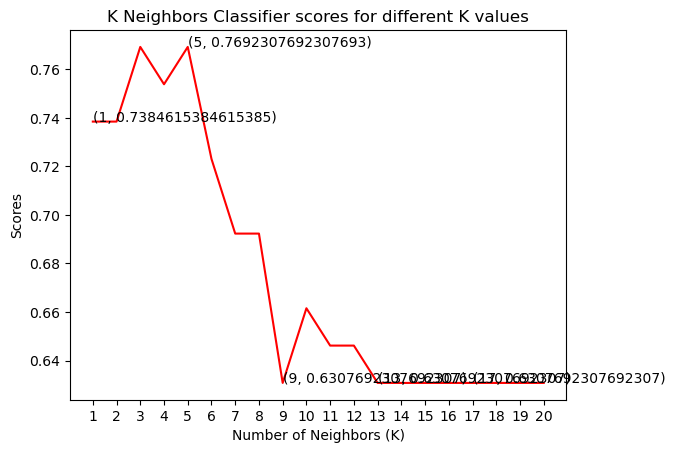

In [112]:
# knn_scores is assumed to be a list of scores for different K values
## Label every 4th point on the plot with its corresponding (K, score) value
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21,4):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [113]:
#From the plot above, it is clear that the maximum score achieved was 0.76 for the 5 neighbors.

# Naive bayes Algoritham

In [114]:
#import gaussian naive bayes model
from sklearn.naive_bayes import GaussianNB

In [115]:
#create a guassian classifier
gnb=GaussianNB()

In [116]:
#train the model using the training sets
gnb.fit(x_train,ytrain)

GaussianNB()

In [117]:
#predict output
gnb_predicted=gnb.predict(x_test)

In [118]:
#check scores
gnb_accuracy=accuracy_score(ytest,gnb_predicted)
gnb_precision=precision_score(ytest,gnb_predicted)
gnb_recall=recall_score(ytest,gnb_predicted)
gnb_fscore=f1_score(ytest,gnb_predicted)

In [119]:
#Update accuracy table
col=['Model','Accuracy','Precision','Recall','F1-Score']
data=[["Log Reg",lr_accuracy,lr_precision,lr_recall,lr_fscore],
      ["KNN",knn_accuracy,knn_precision,knn_recall,knn_fscore],
     ["Naive Bayes",gnb_accuracy,gnb_precision,gnb_recall,gnb_fscore]] 
ml_summary=pd.DataFrame(data,columns=col)
ml_summary

,Model,Accuracy,Precision,Recall,F1-Score
0,Log Reg,0.815385,0.782609,0.72,0.750000
1,KNN,0.769231,0.692308,0.72,0.705882
2,Naive Bayes,0.753846,0.680000,0.68,0.680000


# Descision Tree Algoritham

In [120]:
#import decision tree classifier library 
from sklearn.tree import DecisionTreeClassifier

In [121]:
#create model object, here max_depth is used for pruning
dtree=DecisionTreeClassifier(max_depth=5)

In [122]:
#fit the traing model
dtree.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=5)

In [123]:
#test the model using xtest
dtree_predicted=dtree.predict(xtest)

In [124]:
#check scores
dtree_accuracy=accuracy_score(ytest,dtree_predicted)
dtree_precision=precision_score(ytest,dtree_predicted)
dtree_recall=recall_score(ytest,dtree_predicted)
dtree_fscore=f1_score(ytest,dtree_predicted)

In [125]:
#Update accuracy table
col=['Model','Accuracy','Precision','Recall','F1-Score']
data=[["Log Reg",lr_accuracy,lr_precision,lr_recall,lr_fscore],
      ["KNN",knn_accuracy,knn_precision,knn_recall,knn_fscore],
     ["Naive Bayes",gnb_accuracy,gnb_precision,gnb_recall,gnb_fscore],
     ["Decision Tree",dtree_accuracy,dtree_precision,dtree_recall,dtree_fscore]] 
ml_summary=pd.DataFrame(data,columns=col)
ml_summary

,Model,Accuracy,Precision,Recall,F1-Score
0,Log Reg,0.815385,0.782609,0.72,0.750000
1,KNN,0.769231,0.692308,0.72,0.705882
2,Naive Bayes,0.753846,0.680000,0.68,0.680000
3,Decision Tree,0.769231,0.727273,0.64,0.680851


In [126]:
dt_scores = []
for i in range(1, len(x.columns) + 1):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 0)
    dt_classifier.fit(x_train, ytrain)
    dt_scores.append(dt_classifier.score(x_test, ytest))

Text(0.5, 1.0, 'Decision Tree Classifier scores for different number of maximum features')

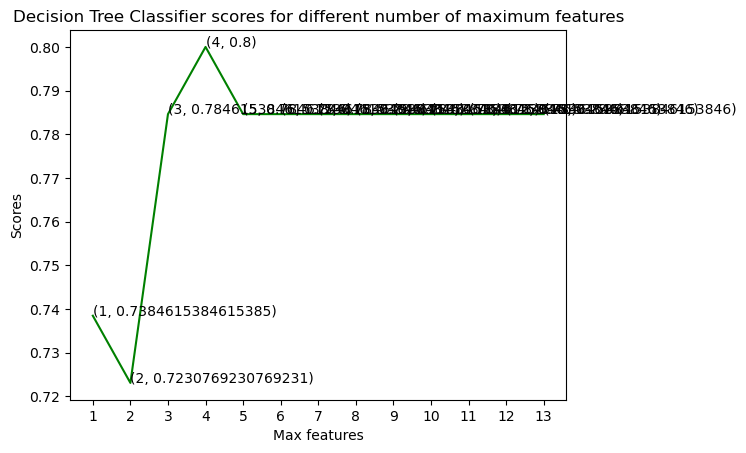

In [127]:
plt.plot([i for i in range(1, len(x.columns) + 1)], dt_scores, color = 'green')
for i in range(1, len(x.columns) + 1):
    plt.text(i, dt_scores[i-1], (i, dt_scores[i-1]))
plt.xticks([i for i in range(1, len(x.columns) + 1)])
plt.xlabel('Max features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different number of maximum features')

In [ ]:
#From the plot above, it is clear that the maximum score achieved was 0.8 for the 4 features

# Random Forest

In [128]:
#import random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [129]:
rfc=RandomForestClassifier(n_estimators=100)

In [130]:
rfc.fit(x_train,ytrain)

RandomForestClassifier()

In [131]:
rfc_predicted=rfc.predict(x_test)

In [132]:
#check scores
rfc_accuracy=accuracy_score(ytest,rfc_predicted)
rfc_precision=precision_score(ytest,rfc_predicted)
rfc_recall=recall_score(ytest,rfc_predicted)
rfc_fscore=f1_score(ytest,rfc_predicted)

In [133]:
#Update accuracy table
col=['Model','Accuracy','Precision','Recall','F1-Score']
data=[["Log Reg",lr_accuracy,lr_precision,lr_recall,lr_fscore],
      ["KNN",knn_accuracy,knn_precision,knn_recall,knn_fscore],
     ["Naive Bayes",gnb_accuracy,gnb_precision,gnb_recall,gnb_fscore],
     ["Decision Tree",dtree_accuracy,dtree_precision,dtree_recall,dtree_fscore],
     ["Random forest",rfc_accuracy,rfc_precision,rfc_recall,rfc_fscore]] 
ml_summary=pd.DataFrame(data,columns=col)
ml_summary

,Model,Accuracy,Precision,Recall,F1-Score
0,Log Reg,0.815385,0.782609,0.72,0.750000
1,KNN,0.769231,0.692308,0.72,0.705882
2,Naive Bayes,0.753846,0.680000,0.68,0.680000
3,Decision Tree,0.769231,0.727273,0.64,0.680851
4,Random forest,0.800000,0.772727,0.68,0.723404


# SVM

In [134]:
#Support Vector Machine (SVC: Support Vector Classifier)
from sklearn.svm import SVC
#create an instance of SVM
svm = SVC(kernel='linear')
#Fit the model
svm.fit(x_train,ytrain)
#Predict the response from xtest
svm_predicted=svm.predict(x_test)
#check scores
svm_accuracy=accuracy_score(ytest, svm_predicted)
svm_precision=precision_score(ytest, svm_predicted)
svm_recall=recall_score(ytest, svm_predicted)
svm_fscore=f1_score(ytest, svm_predicted)

In [135]:
#Update accuracy table
col=['Model','Accuracy','Precision','Recall','F1-Score']
data=[["Log Reg",lr_accuracy,lr_precision,lr_recall,lr_fscore],
      ["KNN",knn_accuracy,knn_precision,knn_recall,knn_fscore],
     ["Naive Bayes",gnb_accuracy,gnb_precision,gnb_recall,gnb_fscore],
     ["Decision Tree",dtree_accuracy,dtree_precision,dtree_recall,dtree_fscore],
     ["Random Forest",rfc_accuracy,rfc_precision,rfc_recall,rfc_fscore],
     ["SVM",svm_accuracy,svm_precision, svm_recall,svm_fscore]] 
ml_summary=pd.DataFrame(data,columns=col)
ml_summary

,Model,Accuracy,Precision,Recall,F1-Score
0,Log Reg,0.815385,0.782609,0.72,0.750000
1,KNN,0.769231,0.692308,0.72,0.705882
2,Naive Bayes,0.753846,0.680000,0.68,0.680000
3,Decision Tree,0.769231,0.727273,0.64,0.680851
4,Random Forest,0.800000,0.772727,0.68,0.723404
5,SVM,0.830769,0.818182,0.72,0.765957


# Conclusion

In [136]:

#In this project, I used Machine Learning to predict whether a person is suffering from a heart disease. After importing the data, I analysed it using plots. 
#Then, I did feature engineering techniques for improving the model performance. 
#I then applied five Machine Learning algorithms,logistic regression,Naive bayes, K Neighbors Classifier, Support Vector Classifier, Decision Tree Classifier and Random Forest Classifier. 
#I varied parameters across each model to improve their scores. In the end, SVM Classifier achieved the highest score of 83% .